<center><img src="ignaz_semmelweis_1860_small.jpeg"></center>

Hungarian physician Dr. Ignaz Semmelweis worked at the Vienna General Hospital with childbed fever patients. Childbed fever is a deadly disease affecting women who have just given birth, and in the early 1840s, as many as 10% of the women giving birth died from it at the Vienna General Hospital. Dr.Semmelweis discovered that it was the contaminated hands of the doctors delivering the babies, and on **June 1st, 1847**, he decreed that everyone should wash their hands, an unorthodox and controversial request; nobody in Vienna knew about bacteria.

You will reanalyze the data that made Semmelweis discover the importance of handwashing and its impact on the hospital and the number of deaths.

The data is stored as two CSV files within the `data` folder.

`data/yearly_deaths_by_clinic.csv` contains the number of women giving birth at the two clinics at the Vienna General Hospital between the years 1841 and 1846.

| Column | Description |
|--------|-------------|
|`year`  |Years (1841-1846)|
|`births`|Number of births|
|`deaths`|Number of deaths|
|`clinic`|Clinic 1 or clinic 2|

`data/monthly_deaths.csv` contains data from 'Clinic 1' of the hospital where most deaths occurred.

| Column | Description |
|--------|-------------|
|`date`|Date (YYYY-MM-DD)
|`births`|Number of births|
|`deaths`|Number of deaths|

In [89]:
# Imported libraries
import pandas as pd
import matplotlib.pyplot as plt

## Getting Started
The two csv files, `yearly_deaths_by_clinic.csv` and `monthly_deaths.csv` were read into Python as DataFrames titled `yearly_deaths` and `monthly_deaths_c1`, respectively. The data stored in the 'date' column of `monthly_deaths_c1` was converted to datetime, and the year and month were extracted and stored in separate columns. 

In [90]:
yearly_deaths = pd.read_csv('data/yearly_deaths_by_clinic.csv')
monthly_deaths_c1 = pd.read_csv('data/monthly_deaths.csv')
print(yearly_deaths.info())
print(monthly_deaths_c1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    98 non-null     object
 1   births  98 non-null     int64 
 2   deaths  98 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB
None


In [91]:
yearly_deaths.head()

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


In [92]:
monthly_deaths_c1.head()

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


In [93]:
#Convert date to datetime and extract year and month
monthly_deaths_c1['date'] = pd.to_datetime(monthly_deaths_c1['date'], errors= 'coerce')
monthly_deaths_c1['year'] = monthly_deaths_c1['date'].dt.year
monthly_deaths_c1['month'] = monthly_deaths_c1['date'].dt.month
print(monthly_deaths_c1.head())

        date  births  deaths  year  month
0 1841-01-01     254      37  1841      1
1 1841-02-01     239      18  1841      2
2 1841-03-01     277      12  1841      3
3 1841-04-01     255       4  1841      4
4 1841-05-01     255       2  1841      5


## Question 1: What year had the highest yearly proportion of deaths at each clinic? Visualize the data and store the answer as an integer variable `highest_year`.
The death proportion for each year at each clinic was calculated and stored in the column 'death_prop'.The proportion of deaths per year per clinic was then visualized in a barplot. Next, the year with the highest death proportion and its death proportion was printed for each clinic. Both clinics had the highest yearly proportion of deaths in 1842, with clinic 1 having a death proportion of approximately 0.158 and clinic 2 having a death proportion of approximately 0.076.

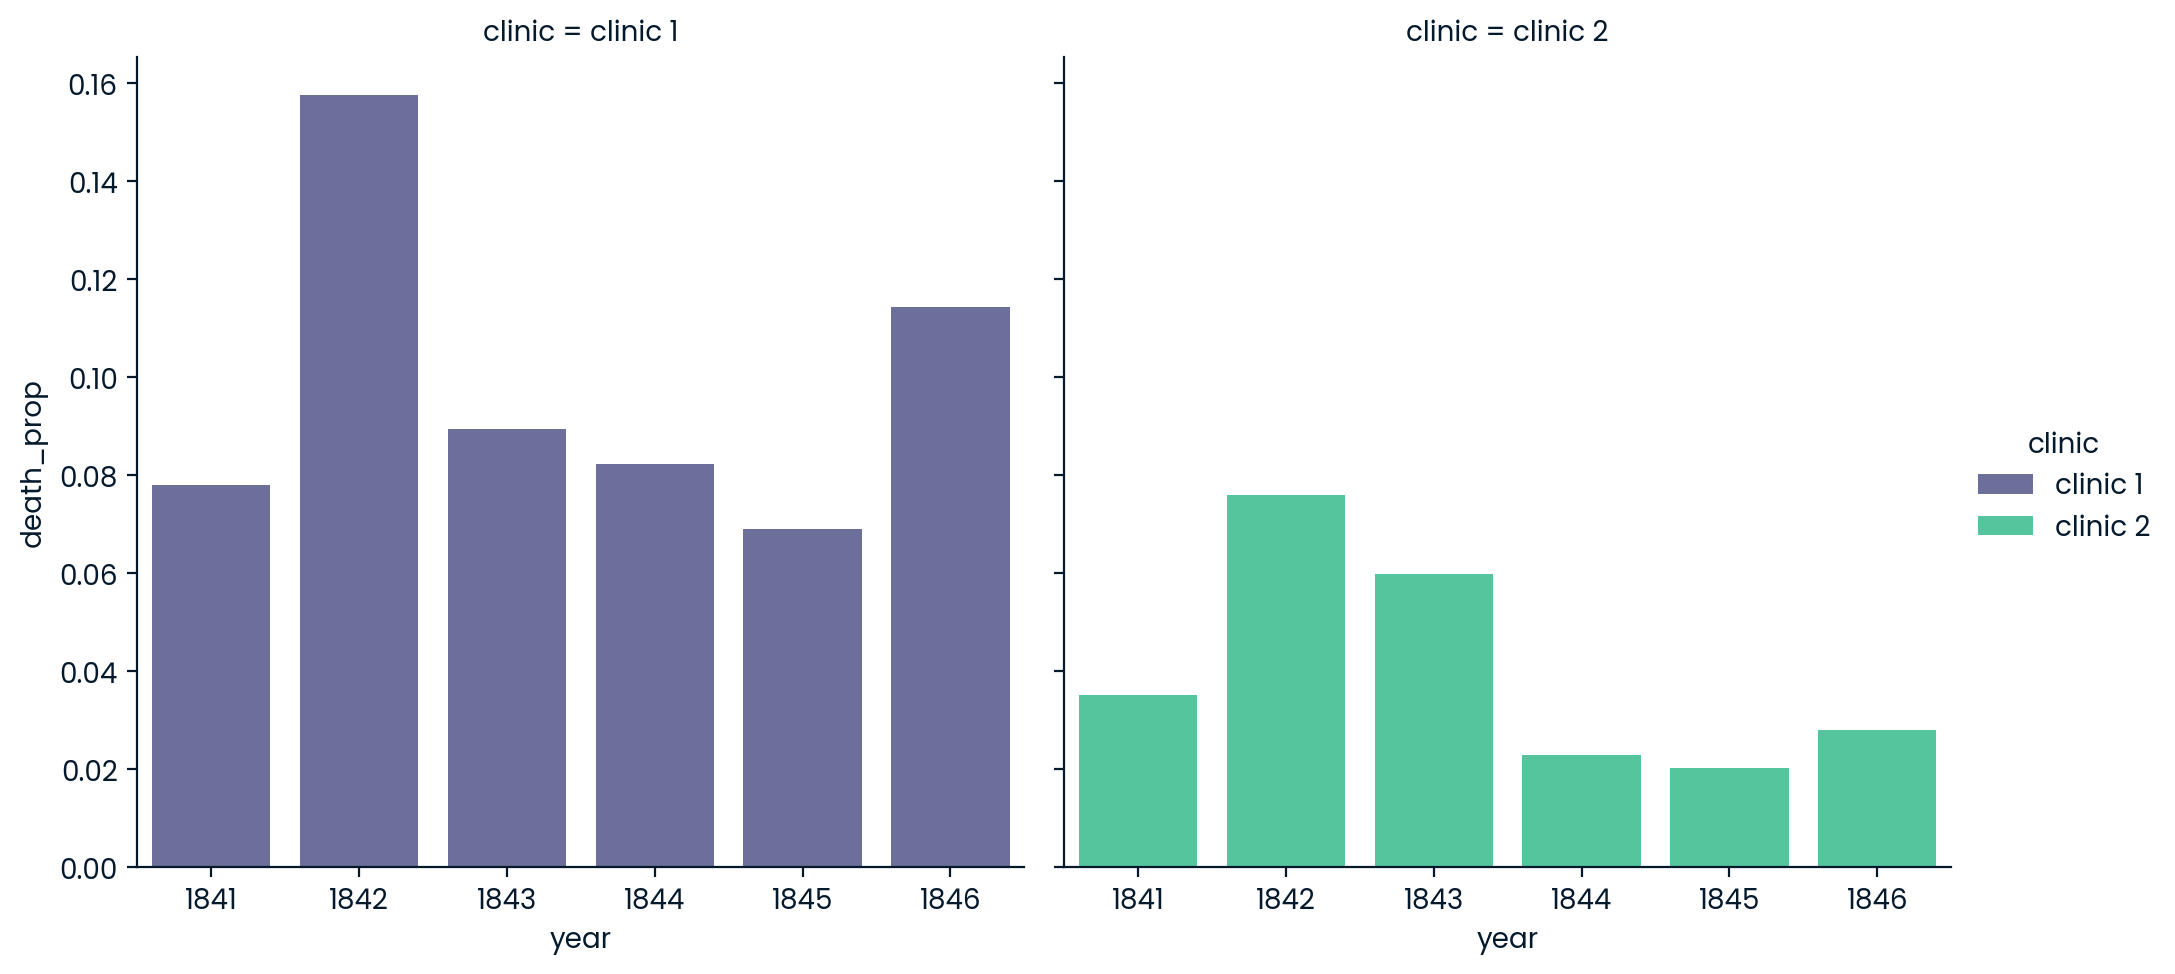

clinic
clinic 1    1
clinic 2    7
Name: death_prop, dtype: int64
   year    clinic  death_prop
1  1842  clinic 1    0.157591
7  1842  clinic 2    0.075968


In [94]:
#Calculate the yearly proportion of deaths
yearly_deaths['death_prop'] = yearly_deaths['deaths']/yearly_deaths['births']

#Plot the yearly death proportion by clinic
import matplotlib.pyplot as plt
import seaborn as sns
g = sns.catplot(x= 'year', y = 'death_prop', data = yearly_deaths, kind= 'bar', col = 'clinic', hue = 'clinic')
plt.show()

#Calculate the highest yearly death proportion by clinic
max_idx = yearly_deaths.groupby('clinic')['death_prop'].idxmax()
print(max_idx)
print(yearly_deaths.iloc[[1, 7], [0,3,4]])

#Save year with highest yearly death proportion
highest_year = 1842



## Question 2: Handwashing was introduced on June 1st, 1847. What are the mean proportions of deaths before and after handwashing from the monthly data? Store the result as a 2x2 DataFrame named `monthly_summary` with the first column, `handwashing_started`, being a boolean flag and the second column having the mean proportion of deaths.
A death proportion per month column, titled 'death_prop', was created in the `monthly_deaths_c1` DataFrame. The column 'handwashing_started' was then created, indicating if handwashing was occuring during that month. The mean monthly mortality rate before and after handwashing was implemented was then calculated. The mean monthly death rate was approximately 10.5% before handwashing, and dropped down to 2.1% after handwashing was implemented. 

In [95]:
#Create death proportions column
monthly_deaths_c1['death_prop'] = monthly_deaths_c1['deaths']/ monthly_deaths_c1['births']

#Create new column 'handwashing_started'
monthly_deaths_c1['handwashing_started'] = monthly_deaths_c1['date'] >= '1847-06-01'
print(monthly_deaths_c1)

#Calculating mean monthly death proportion before and after handwashing implemented
monthly_summary = pd.DataFrame(monthly_deaths_c1.groupby('handwashing_started')['death_prop'].mean())
monthly_summary.reset_index(drop=False, inplace=True)
print(monthly_summary)

         date  births  deaths  year  month  death_prop  handwashing_started
0  1841-01-01     254      37  1841      1    0.145669                False
1  1841-02-01     239      18  1841      2    0.075314                False
2  1841-03-01     277      12  1841      3    0.043321                False
3  1841-04-01     255       4  1841      4    0.015686                False
4  1841-05-01     255       2  1841      5    0.007843                False
..        ...     ...     ...   ...    ...         ...                  ...
93 1848-11-01     310       9  1848     11    0.029032                 True
94 1848-12-01     373       5  1848     12    0.013405                 True
95 1849-01-01     403       9  1849      1    0.022333                 True
96 1849-02-01     389      12  1849      2    0.030848                 True
97 1849-03-01     406      20  1849      3    0.049261                 True

[98 rows x 7 columns]
   handwashing_started  death_prop
0                False    0.10

## Question 3: Analyze the difference in the mean monthly proportion of deaths before and after the introduction of handwashing using all of the data and calculate a 95% confidence interval. Store your answer as a pandas series `confidence_interval`.
First, the `monthly_deaths_c1` DataFrame was separated into two DataFrames depending on if handwashing had begun or not. Bootstrapping was then performed to estimate the population difference of the death proportion before and after handwashing. The 95% confidence interval of the results was then calculated, stating that implementing handwashing decreased the proportion of deaths by between 0.067 to 0.100.


In [96]:
#Separating monthly_deaths_c1 into two DataFrames on whether or not handwashing had begun
before_handwashing = monthly_deaths_c1[monthly_deaths_c1['handwashing_started'] == False]
after_handwashing = monthly_deaths_c1[monthly_deaths_c1['handwashing_started'] == True]

#Use bootstrapping to create the theoretical death_prop population difference by calculating means before and after handwashing, subtracting the two to get the difference
import numpy as np
mean_death_prop_diff = []
for i in range(1000):
    mean_death_prop_diff.append(
        np.mean(after_handwashing.sample(frac=1, replace=True)['death_prop']) -
         np.mean(before_handwashing.sample(frac=1, replace=True)['death_prop'])
        )
confidence_interval = pd.Series(np.quantile(mean_death_prop_diff, [0.0275, 0.975]))
print(confidence_interval)


0   -0.100472
1   -0.068035
dtype: float64
